# Analyzing Historical Stock/Revenue Data and Builidng a Dashboard

## Question 1. Extracting Tesla Stock Data Using yfinance

In [1]:
# importing libraries
import pandas as pd
import yfinance as yf

In [2]:
# using 'Ticker' module to extract data
tesla = yf.Ticker("TSLA")

In [3]:
# using the attribue 'info' 
tesla_info = tesla.info
tesla_info

{'zip': '94304',
 'sector': 'Consumer Cyclical',
 'fullTimeEmployees': 70757,
 'longBusinessSummary': 'Tesla, Inc. designs, develops, manufactures, leases, and sells electric vehicles, and energy generation and storage systems in the United States, China, and internationally. The company operates in two segments, Automotive, and Energy Generation and Storage. The Automotive segment offers electric vehicles, as well as sells automotive regulatory credits. It provides sedans and sport utility vehicles through direct and used vehicle sales, a network of Tesla Superchargers, and in-app upgrades; and purchase financing and leasing services. This segment is also involved in the provision of non-warranty after-sales vehicle services, sale of used vehicles, retail merchandise, and vehicle insurance, as well as sale of products through its subsidiaries to third party customers; services for electric vehicles through its company-owned service locations, and Tesla mobile service technicians; and 

In [4]:
# Extracting share price 
tesla_share_price_data = tesla.history(period = "max")
tesla_share_price_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29,3.800,5.000,3.508,4.778,93831500,0,0.0
2010-06-30,5.158,6.084,4.660,4.766,85935500,0,0.0
2010-07-01,5.000,5.184,4.054,4.392,41094000,0,0.0
2010-07-02,4.600,4.620,3.742,3.840,25699000,0,0.0
2010-07-06,4.000,4.000,3.166,3.222,34334500,0,0.0


## Question 2. Extracting Tesla Revenue Data Using Webscraping

In [5]:
# importing libraries
import requests
from bs4 import BeautifulSoup

In [6]:
# using 'requests' library to download the webpage below
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data = requests.get(url)
html_data

<Response [200]>

In [7]:
soup = BeautifulSoup(html_data.text, 'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <link href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" rel="canonical"/>
  <title>
   Tesla Revenue 2009-2020 | TSLA | MacroTrends
  </title>
  <meta content="Tesla annual/quarterly revenue history and growth rate from 2009 to 2020. Revenue can be defined as the amount of money a company receives from its customers in exchange for the sales of goods or services.  Revenue is the top line item on an income statement from which all costs and expenses are subtracted to arrive at net income.    
				
				&lt;ul style='margin-top:10px;'&gt;
				&lt;li&gt;Tesla revenue for the quarter end

In [8]:
soup.title

<title>Tesla Revenue 2009-2020 | TSLA | MacroTrends</title>

In [9]:
# finding the class 'historical_data_table table' in the HTML script
tesla_annual_revenue = soup.find('table', {'class':'historical_data_table table'})
tesla_annual_revenue

<table class="historical_data_table table">
<thead>
<tr>
<th colspan="2" style="text-align:center">Tesla Annual Revenue<br/><span style="font-size:14px;">(Millions of US $)</span></th>
</tr>
</thead>
<tbody>
<tr>
<td style="text-align:center">2020</td>
<td style="text-align:center">$31,536</td>
</tr>
<tr>
<td style="text-align:center">2019</td>
<td style="text-align:center">$24,578</td>
</tr>
<tr>
<td style="text-align:center">2018</td>
<td style="text-align:center">$21,461</td>
</tr>
<tr>
<td style="text-align:center">2017</td>
<td style="text-align:center">$11,759</td>
</tr>
<tr>
<td style="text-align:center">2016</td>
<td style="text-align:center">$7,000</td>
</tr>
<tr>
<td style="text-align:center">2015</td>
<td style="text-align:center">$4,046</td>
</tr>
<tr>
<td style="text-align:center">2014</td>
<td style="text-align:center">$3,198</td>
</tr>
<tr>
<td style="text-align:center">2013</td>
<td style="text-align:center">$2,013</td>
</tr>
<tr>
<td style="text-align:center">2012</td>

In [10]:
# getting the number of columns in the table
for row in tesla_annual_revenue.findAll("tr"):
    cells = row.findAll("td")

len(cells)

2

In [11]:
# getting the number of rows in the table including header
rows = tesla_annual_revenue.findAll("tr")
len(rows)

14

In [12]:
# getting the table Header
header = [th.text.rstrip() for th in rows[0].find_all('th')]

print(header)
print(len(header))

['Tesla Annual Revenue(Millions of US $)']
1


In [13]:
# scraping the data and append to respective lists
c1 = []
c2 = []

for row in tesla_annual_revenue.findAll("tr"):
    cells = row.findAll('td')
    if len(cells) == 2: # Only extract table body not heading
        c1.append(cells[0].find(text = True))
        c2.append(cells[1].find(text = True))

In [14]:
# making a dictionary to become a dataframe
d = dict([(x, 0) for x in header])
d

{'Tesla Annual Revenue(Millions of US $)': 0}

In [15]:
# making a dataframe
d['Year'] = c1
d['Tesla Annual Revenue(Millions of US $)'] = c2

In [16]:
df = pd.DataFrame(d)

In [17]:
df.tail()

,Tesla Annual Revenue(Millions of US $),Year
8,$413,2012
9,$204,2011
10,$117,2010
11,$112,2009
12,$15,2008


## Question 3. Extracting GameStop Stock Data Using yfinance

In [18]:
# using 'Ticker' module to extract data
game = yf.Ticker("GME")

In [19]:
# using the attribue 'info' 
game_info = game.info
game_info

{'zip': '76051',
 'sector': 'Consumer Cyclical',
 'fullTimeEmployees': 14000,
 'longBusinessSummary': 'GameStop Corp. operates as a multichannel video game, consumer electronics, and collectibles retailer in the United States, Canada, Australia, and Europe. The company sells new and pre-owned video game platforms; accessories, including controllers, gaming headsets, virtual reality products, and memory cards; new and pre-owned video game software; and in-game digital currency, digital downloadable content, and full-game downloads, as well as network points cards, and prepaid digital and prepaid subscription cards. It also sells collectibles comprising licensed merchandise primarily related to the video game, television, and movie industries, as well as pop culture themes. The company operates its stores and e-commerce sites under the GameStop, EB Games, and Micromania brands; and collectibles stores under the Zing Pop Culture and ThinkGeek brand, as well as offers Game Informer, a prin

In [20]:
# Extracting share price 
game_share_price_data = game.history(period = "max")
game_share_price_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-02-13,6.480513,6.773399,6.413183,6.766666,19054000,0.0,0.0
2002-02-14,6.850831,6.864296,6.682506,6.733003,2755400,0.0,0.0
2002-02-15,6.733001,6.749833,6.632006,6.699336,2097400,0.0,0.0
2002-02-19,6.665671,6.665671,6.312189,6.430017,1852600,0.0,0.0
2002-02-20,6.463681,6.648838,6.413183,6.648838,1723200,0.0,0.0


## Question 4. Extracting GameStop Revenue Data Using Webscraping

In [21]:
# using 'requests' library to download the webpage below
url_1 = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
html_data_1 = requests.get(url_1)
html_data_1

<Response [200]>

In [22]:
soup_1 = BeautifulSoup(html_data_1.text, 'html.parser')
print(soup_1.prettify())

<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <link href="https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue" rel="canonical"/>
  <title>
   GameStop Revenue 2006-2020 | GME | MacroTrends
  </title>
  <meta content="GameStop revenue from 2006 to 2020. Revenue can be defined as the amount of money a company receives from its customers in exchange for the sales of goods or services.  Revenue is the top line item on an income statement from which all costs and expenses are subtracted to arrive at net income." name="description">
   <meta content="" name="robots">
    <link href="/assets/images/icons/FAVICON/macro-trends_favicon.ico" rel

In [23]:
# finding the class 'historical_data_table table' in the HTML script
game_annual_revenue = soup_1.find('table', {'class':'historical_data_table table'})
game_annual_revenue

<table class="historical_data_table table">
<thead>
<tr>
<th colspan="2" style="text-align:center">GameStop Annual Revenue<br/><span style="font-size:14px;">(Millions of US $)</span></th>
</tr>
</thead>
<tbody>
<tr>
<td style="text-align:center">2020</td>
<td style="text-align:center">$6,466</td>
</tr>
<tr>
<td style="text-align:center">2019</td>
<td style="text-align:center">$8,285</td>
</tr>
<tr>
<td style="text-align:center">2018</td>
<td style="text-align:center">$8,547</td>
</tr>
<tr>
<td style="text-align:center">2017</td>
<td style="text-align:center">$7,965</td>
</tr>
<tr>
<td style="text-align:center">2016</td>
<td style="text-align:center">$9,364</td>
</tr>
<tr>
<td style="text-align:center">2015</td>
<td style="text-align:center">$9,296</td>
</tr>
<tr>
<td style="text-align:center">2014</td>
<td style="text-align:center">$9,040</td>
</tr>
<tr>
<td style="text-align:center">2013</td>
<td style="text-align:center">$8,887</td>
</tr>
<tr>
<td style="text-align:center">2012</td>


In [24]:
# getting the number of columns in the table
for row in game_annual_revenue.findAll("tr"):
    cells = row.findAll("td")

len(cells)

2

In [25]:
# getting the number of rows in the table including header
rows_1 = game_annual_revenue.findAll("tr")
len(rows_1)

17

In [26]:
# getting the table Header
header_1 = [th.text.rstrip() for th in rows_1[0].find_all('th')]

print(header_1)
print(len(header_1))

['GameStop Annual Revenue(Millions of US $)']
1


In [27]:
# scraping the data and append to respective lists
c1 = []
c2 = []

for row in game_annual_revenue.findAll("tr"):
    cells = row.findAll('td')
    if len(cells) == 2: # Only extract table body not heading
        c1.append(cells[0].find(text = True))
        c2.append(cells[1].find(text = True))

In [28]:
# making a dictionary to become a dataframe
d_1 = dict([(x, 0) for x in header_1])
d_1

{'GameStop Annual Revenue(Millions of US $)': 0}

In [29]:
# making a dataframe
d_1['Year'] = c1
d_1['Gamestop Annual Revenue(Millions of US $)'] = c2

In [30]:
df_1 = pd.DataFrame(d_1)

In [31]:
df_1.head()

,GameStop Annual Revenue(Millions of US $),Year,Gamestop Annual Revenue(Millions of US $)
0,0,2020,"$6,466"
1,0,2019,"$8,285"
2,0,2018,"$8,547"
3,0,2017,"$7,965"
4,0,2016,"$9,364"


In [32]:
df_1.shape

(16, 3)

In [33]:
df_1 = df_1.drop(df_1.columns[0], axis = 1)

In [34]:
df_1.tail()

,Year,Gamestop Annual Revenue(Millions of US $)
11,2009,"$8,806"
12,2008,"$7,094"
13,2007,"$5,319"
14,2006,"$3,092"
15,2005,"$1,843"


## Question 5. Tesla Stock and Revenue Dashboard

In [35]:
tesla_share_price_data.reset_index(inplace = True)

In [36]:
# figuring out the type of 'Date' element
type(tesla_share_price_data.iloc[0, 0])

pandas._libs.tslibs.timestamps.Timestamp

In [37]:
# changing timestamps to just years, grouping by same years, and providing means of each year
tesla_stock = tesla_share_price_data.groupby(pd.Grouper(key = 'Date', freq = '1Y')).mean()
tesla_stock.reset_index(inplace = True)

In [38]:
tesla_stock

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-12-31,4.681600,4.815446,4.529215,4.668369,7.898812e+06,0.0,0.000000
1,2011-12-31,5.364397,5.476048,5.238833,5.360952,6.453077e+06,0.0,0.000000
2,2012-12-31,6.240624,6.361832,6.109176,6.233720,6.148980e+06,0.0,0.000000
3,2013-12-31,20.883286,21.370603,20.355976,20.880246,4.203861e+07,0.0,0.000000
4,2014-12-31,44.683079,45.489976,43.841222,44.665817,3.456987e+07,0.0,0.000000
5,2015-12-31,45.966389,46.676333,45.254127,46.008579,2.159162e+07,0.0,0.000000
6,2016-12-31,42.011690,42.686699,41.257230,41.953452,2.306273e+07,0.0,0.000000
7,2017-12-31,62.859243,63.690119,61.937394,62.863259,3.167393e+07,0.0,0.000000
8,2018-12-31,63.436693,64.738725,62.110462,63.461984,4.306053e+07,0.0,0.000000
9,2019-12-31,54.605627,55.529960,53.722508,54.706040,4.579461e+07,0.0,0.000000


In [39]:
# creating a column 'Year' where only years are written and dropping the 'Data' list
tesla_stock['Year'] = pd.DatetimeIndex(tesla_stock['Date']).year
tesla_stock.drop(['Date'], axis = 1, inplace = True)

In [40]:
tesla_stock

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Year
0,4.681600,4.815446,4.529215,4.668369,7.898812e+06,0.0,0.000000,2010
1,5.364397,5.476048,5.238833,5.360952,6.453077e+06,0.0,0.000000,2011
2,6.240624,6.361832,6.109176,6.233720,6.148980e+06,0.0,0.000000,2012
3,20.883286,21.370603,20.355976,20.880246,4.203861e+07,0.0,0.000000,2013
4,44.683079,45.489976,43.841222,44.665817,3.456987e+07,0.0,0.000000,2014
5,45.966389,46.676333,45.254127,46.008579,2.159162e+07,0.0,0.000000,2015
6,42.011690,42.686699,41.257230,41.953452,2.306273e+07,0.0,0.000000,2016
7,62.859243,63.690119,61.937394,62.863259,3.167393e+07,0.0,0.000000,2017
8,63.436693,64.738725,62.110462,63.461984,4.306053e+07,0.0,0.000000,2018
9,54.605627,55.529960,53.722508,54.706040,4.579461e+07,0.0,0.000000,2019


In [41]:
df

,Tesla Annual Revenue(Millions of US $),Year
0,"$31,536",2020
1,"$24,578",2019
2,"$21,461",2018
3,"$11,759",2017
4,"$7,000",2016
5,"$4,046",2015
6,"$3,198",2014
7,"$2,013",2013
8,$413,2012
9,$204,2011


In [42]:
# checking the type of 'Year' lists in two different dataframes before merging them
print(type(df.iloc[0, 1]))

<class 'bs4.element.NavigableString'>


In [43]:
print(type(tesla_stock.iloc[0, 0]))

<class 'numpy.float64'>


In [44]:
# changing the type of element
df['Year'] = [int(item) for item in df['Year']]

In [45]:
# creating a new dataframe in which the two dataframes are merged, which is the dashboard
Tesla_dash = pd.merge(df, tesla_stock, on = 'Year')

In [46]:
Tesla_dash

,Tesla Annual Revenue(Millions of US $),Year,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,"$31,536",2020,289.108428,297.288411,280.697937,289.997067,7.532934e+07,0.0,0.019763
1,"$24,578",2019,54.605627,55.529960,53.722508,54.706040,4.579461e+07,0.0,0.000000
2,"$21,461",2018,63.436693,64.738725,62.110462,63.461984,4.306053e+07,0.0,0.000000
3,"$11,759",2017,62.859243,63.690119,61.937394,62.863259,3.167393e+07,0.0,0.000000
4,"$7,000",2016,42.011690,42.686699,41.257230,41.953452,2.306273e+07,0.0,0.000000
5,"$4,046",2015,45.966389,46.676333,45.254127,46.008579,2.159162e+07,0.0,0.000000
6,"$3,198",2014,44.683079,45.489976,43.841222,44.665817,3.456987e+07,0.0,0.000000
7,"$2,013",2013,20.883286,21.370603,20.355976,20.880246,4.203861e+07,0.0,0.000000
8,$413,2012,6.240624,6.361832,6.109176,6.233720,6.148980e+06,0.0,0.000000
9,$204,2011,5.364397,5.476048,5.238833,5.360952,6.453077e+06,0.0,0.000000


In [47]:
# organizing teh columns
Tesla_dash = Tesla_dash[['Year', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits', 'Tesla Annual Revenue(Millions of US $)']]

In [48]:
Tesla_dash

,Year,Open,High,Low,Close,Volume,Dividends,Stock Splits,Tesla Annual Revenue(Millions of US $)
0,2020,289.108428,297.288411,280.697937,289.997067,7.532934e+07,0.0,0.019763,"$31,536"
1,2019,54.605627,55.529960,53.722508,54.706040,4.579461e+07,0.0,0.000000,"$24,578"
2,2018,63.436693,64.738725,62.110462,63.461984,4.306053e+07,0.0,0.000000,"$21,461"
3,2017,62.859243,63.690119,61.937394,62.863259,3.167393e+07,0.0,0.000000,"$11,759"
4,2016,42.011690,42.686699,41.257230,41.953452,2.306273e+07,0.0,0.000000,"$7,000"
5,2015,45.966389,46.676333,45.254127,46.008579,2.159162e+07,0.0,0.000000,"$4,046"
6,2014,44.683079,45.489976,43.841222,44.665817,3.456987e+07,0.0,0.000000,"$3,198"
7,2013,20.883286,21.370603,20.355976,20.880246,4.203861e+07,0.0,0.000000,"$2,013"
8,2012,6.240624,6.361832,6.109176,6.233720,6.148980e+06,0.0,0.000000,$413
9,2011,5.364397,5.476048,5.238833,5.360952,6.453077e+06,0.0,0.000000,$204


In [62]:
# checking the type of annual revenue
type(Tesla_dash.iloc[0, 8])

bs4.element.NavigableString

In [63]:
# changing the type of annual revenue to float, getting rid of $ and ,
Tesla_dash['Tesla Annual Revenue(Millions of US $)'] = Tesla_dash['Tesla Annual Revenue(Millions of US $)'].replace({'\$': '', ',': ''}, regex = True).astype(float)

type(Tesla_dash.iloc[0, 8])

In [65]:
Tesla_dash

,Year,Open,High,Low,Close,Volume,Dividends,Stock Splits,Tesla Annual Revenue(Millions of US $)
0,2020,289.108428,297.288411,280.697937,289.997067,7.532934e+07,0.0,0.019763,31536.0
1,2019,54.605627,55.529960,53.722508,54.706040,4.579461e+07,0.0,0.000000,24578.0
2,2018,63.436693,64.738725,62.110462,63.461984,4.306053e+07,0.0,0.000000,21461.0
3,2017,62.859243,63.690119,61.937394,62.863259,3.167393e+07,0.0,0.000000,11759.0
4,2016,42.011690,42.686699,41.257230,41.953452,2.306273e+07,0.0,0.000000,7000.0
5,2015,45.966389,46.676333,45.254127,46.008579,2.159162e+07,0.0,0.000000,4046.0
6,2014,44.683079,45.489976,43.841222,44.665817,3.456987e+07,0.0,0.000000,3198.0
7,2013,20.883286,21.370603,20.355976,20.880246,4.203861e+07,0.0,0.000000,2013.0
8,2012,6.240624,6.361832,6.109176,6.233720,6.148980e+06,0.0,0.000000,413.0
9,2011,5.364397,5.476048,5.238833,5.360952,6.453077e+06,0.0,0.000000,204.0


## Question 6. Gamestop Stock and Revenue Dashboard

In [49]:
game_share_price_data.reset_index(inplace = True)

In [50]:
# changing timestamps to just years, grouping by same years, and providing means of each year
game_stock = game_share_price_data.groupby(pd.Grouper(key = 'Date', freq = '1Y')).mean()
game_stock.reset_index(inplace = True)

In [51]:
# creating a column 'Year' where only years are written and dropping the 'Data' list
game_stock['Year'] = pd.DatetimeIndex(game_stock['Date']).year
game_stock.drop(['Date'], axis = 1, inplace = True)


In [52]:
# changing the type of element
df_1['Year'] = [int(item) for item in df_1['Year']]

In [53]:
# creating a new dataframe in which the two dataframes are merged, which is the dashboard
Game_dash = pd.merge(df_1, game_stock, on = 'Year')

In [54]:
Game_dash

,Year,Gamestop Annual Revenue(Millions of US $),Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2020,"$6,466",7.121621,7.496759,6.831186,7.141462,6.684499e+06,0.000000,0.000000
1,2019,"$8,285",7.460375,7.634163,7.306041,7.466377,5.475329e+06,0.001508,0.000000
2,2018,"$8,547",13.513372,13.771933,13.255040,13.509086,4.003371e+06,0.006056,0.000000
3,2017,"$7,965",18.067334,18.291842,17.829554,18.050506,2.864371e+06,0.006056,0.000000
4,2016,"$9,364",22.072064,22.392119,21.722627,22.063336,2.739881e+06,0.005873,0.000000
5,2015,"$9,296",30.615779,31.032210,30.154044,30.607274,2.065014e+06,0.005714,0.000000
6,2014,"$9,040",29.097660,29.531998,28.622715,29.061195,3.352397e+06,0.005238,0.000000
7,2013,"$8,887",28.487785,28.939054,28.042760,28.513039,3.056201e+06,0.004365,0.000000
8,2012,"$9,551",14.937690,15.169566,14.696856,14.930556,3.408874e+06,0.003200,0.000000
9,2011,"$9,474",15.841790,16.076269,15.623742,15.854321,4.036077e+06,0.000000,0.000000


In [55]:
Game_dash = Game_dash[['Year', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits', 'Gamestop Annual Revenue(Millions of US $)']]

In [56]:
Game_dash

,Year,Open,High,Low,Close,Volume,Dividends,Stock Splits,Gamestop Annual Revenue(Millions of US $)
0,2020,7.121621,7.496759,6.831186,7.141462,6.684499e+06,0.000000,0.000000,"$6,466"
1,2019,7.460375,7.634163,7.306041,7.466377,5.475329e+06,0.001508,0.000000,"$8,285"
2,2018,13.513372,13.771933,13.255040,13.509086,4.003371e+06,0.006056,0.000000,"$8,547"
3,2017,18.067334,18.291842,17.829554,18.050506,2.864371e+06,0.006056,0.000000,"$7,965"
4,2016,22.072064,22.392119,21.722627,22.063336,2.739881e+06,0.005873,0.000000,"$9,364"
5,2015,30.615779,31.032210,30.154044,30.607274,2.065014e+06,0.005714,0.000000,"$9,296"
6,2014,29.097660,29.531998,28.622715,29.061195,3.352397e+06,0.005238,0.000000,"$9,040"
7,2013,28.487785,28.939054,28.042760,28.513039,3.056201e+06,0.004365,0.000000,"$8,887"
8,2012,14.937690,15.169566,14.696856,14.930556,3.408874e+06,0.003200,0.000000,"$9,551"
9,2011,15.841790,16.076269,15.623742,15.854321,4.036077e+06,0.000000,0.000000,"$9,474"


In [66]:
# changing the type of annual revenue to float, getting rid of $ and ,
Game_dash['Gamestop Annual Revenue(Millions of US $)'] = Game_dash['Gamestop Annual Revenue(Millions of US $)'].replace({'\$': '', ',': ''}, regex = True).astype(float)

## Question 7. Making stock graphs of two companies

<AxesSubplot:title={'center':'Open stock value of Tesla per year (on average)'}, xlabel='Year'>

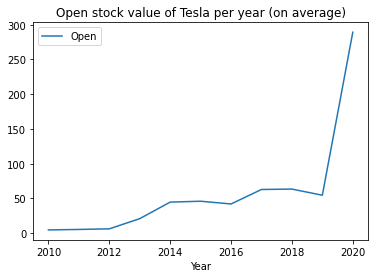

In [57]:
# graph of Tesla
Tesla_dash.plot(x = 'Year', y = 'Open', title = "Open stock value of Tesla per year (on average)")

<AxesSubplot:title={'center':'Tesla Annual Revenue'}, xlabel='Year'>

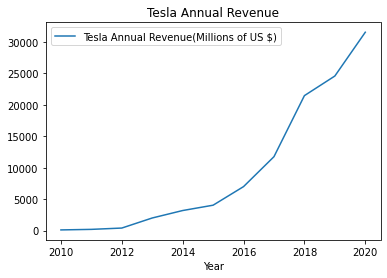

In [67]:
Tesla_dash.plot(x = 'Year', y = 'Tesla Annual Revenue(Millions of US $)', title = "Tesla Annual Revenue")

<AxesSubplot:title={'center':'Open stock value of Gamestop per year (on average)'}, xlabel='Year'>

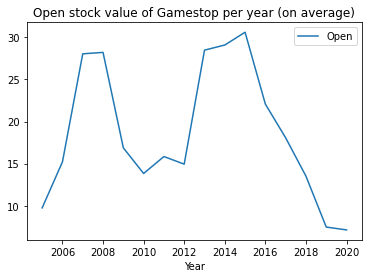

In [68]:
# Graph of Gamestop
Game_dash.plot(x = 'Year', y = 'Open', title = "Open stock value of Gamestop per year (on average)")

<AxesSubplot:title={'center':'Gamestop Annual Revenue'}, xlabel='Year'>

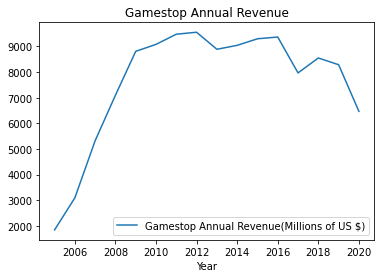

In [69]:
Game_dash.plot(x = 'Year', y = 'Gamestop Annual Revenue(Millions of US $)', title = "Gamestop Annual Revenue")

## Question 8. Sharing your Assignment Notebook